In [39]:
import matplotlib.pyplot as plt

In [64]:
#opens file
vcf=open("yeast_annotated.vcf")
#read depth, quality, allele frequency, predcited effects
rd=[]
qd=[]
af=[]
pred_ef={}
for line in vcf:
    #skips header 
    if '#' in line:
        pass 
    else:
        #splits each line by semicolon
        annotated=line.split(";")
        #goes trhough each field in line
        for field in annotated: 
            #read depth
            if "DP=" in field:
                try:
                    #assumes no comma
                    rd.append(float(field[3:]))
                except ValueError: 
                    #if comma find first and optional second comma. Add each independently
                    index1=field.index(',')
                    rd.append(float(field[3:index1]))
                    if field.count(",")>1:
                        index2=field[field.index(",")+1:].index(",")
                        rd.append(float(field[index1+1:index2+index1+1]))
                        rd.append(float(field[index1+index2+2:]))
                    else:
                        rd.append(float(field[index1+1:]))
            #as with read depth
            elif "QA=" in field and "P" not in field:
                try:
                    qd.append(float(field[3:]))
                except ValueError: 
                    index1=field.index(',')
                    qd.append(float(field[3:index1]))
                    if field.count(",")>1:
                        index2=field[field.index(",")+1:].index(",")
                        qd.append(float(field[index1+1:index2+index1+1]))
                        qd.append(float(field[index1+index2+2:]))
                    else:
                        qd.append(float(field[index1+1:]))
            #as with read depth
            elif "AF=" in field and "S" not in field:
                try:             
                    af.append(float(field[3:]))
                except ValueError: 
                    index1=field.index(',')
                    af.append(float(field[3:index1]))
                    if field.count(",")>1:
                        index2=field[field.index(",")+1:].index(",")
                        af.append(float(field[index1+1:index2+index1+1]))
                        af.append(float(field[index1+index2+2:]))
                    else:
                        af.append(float(field[index1+1:]))
            elif "ANN=" in field:
                variants=field.split(',')
                #each variant is seperated by a comma, unique effects for each variant 
                for variant in variants:
                    #to dal with empty variants
                    if '|' in variant:
                        #finds effect name (it's the second field in each variant )
                        index1=variant.index('|')
                        index2=variant[index1+1:].index('|')
                        name=variant[index1+1:index2+index1+1]
                        pred_ef.setdefault(name,0)
                        pred_ef[name]+=1
print(pred_ef)

{'upstream_gene_variant': 129036, 'downstream_gene_variant': 124623, 'intergenic_region': 16045, 'synonymous_variant': 15912, 'missense_variant': 9525, 'stop_gained': 75, 'intron_variant': 383, 'non_coding_transcript_exon_variant': 227, 'splice_region_variant&intron_variant': 11, 'stop_lost&splice_region_variant': 17, 'frameshift_variant': 156, 'frameshift_variant&stop_lost&splice_region_variant': 3, 'disruptive_inframe_deletion': 23, 'disruptive_inframe_insertion': 10, 'conservative_inframe_insertion': 9, 'stop_lost': 12, 'splice_region_variant&stop_retained_variant': 29, 'stop_retained_variant': 2, 'initiator_codon_variant': 1, 'start_lost': 18, 'conservative_inframe_deletion': 6, 'splice_region_variant&non_coding_transcript_exon_variant': 1, '': 678, 'frameshift_variant&start_lost': 4, 'splice_donor_variant&intron_variant': 1, 'frameshift_variant&splice_region_variant': 1, 'splice_acceptor_variant&intron_variant': 1, 'splice_region_variant&synonymous_variant': 2, 'start_lost&conserv

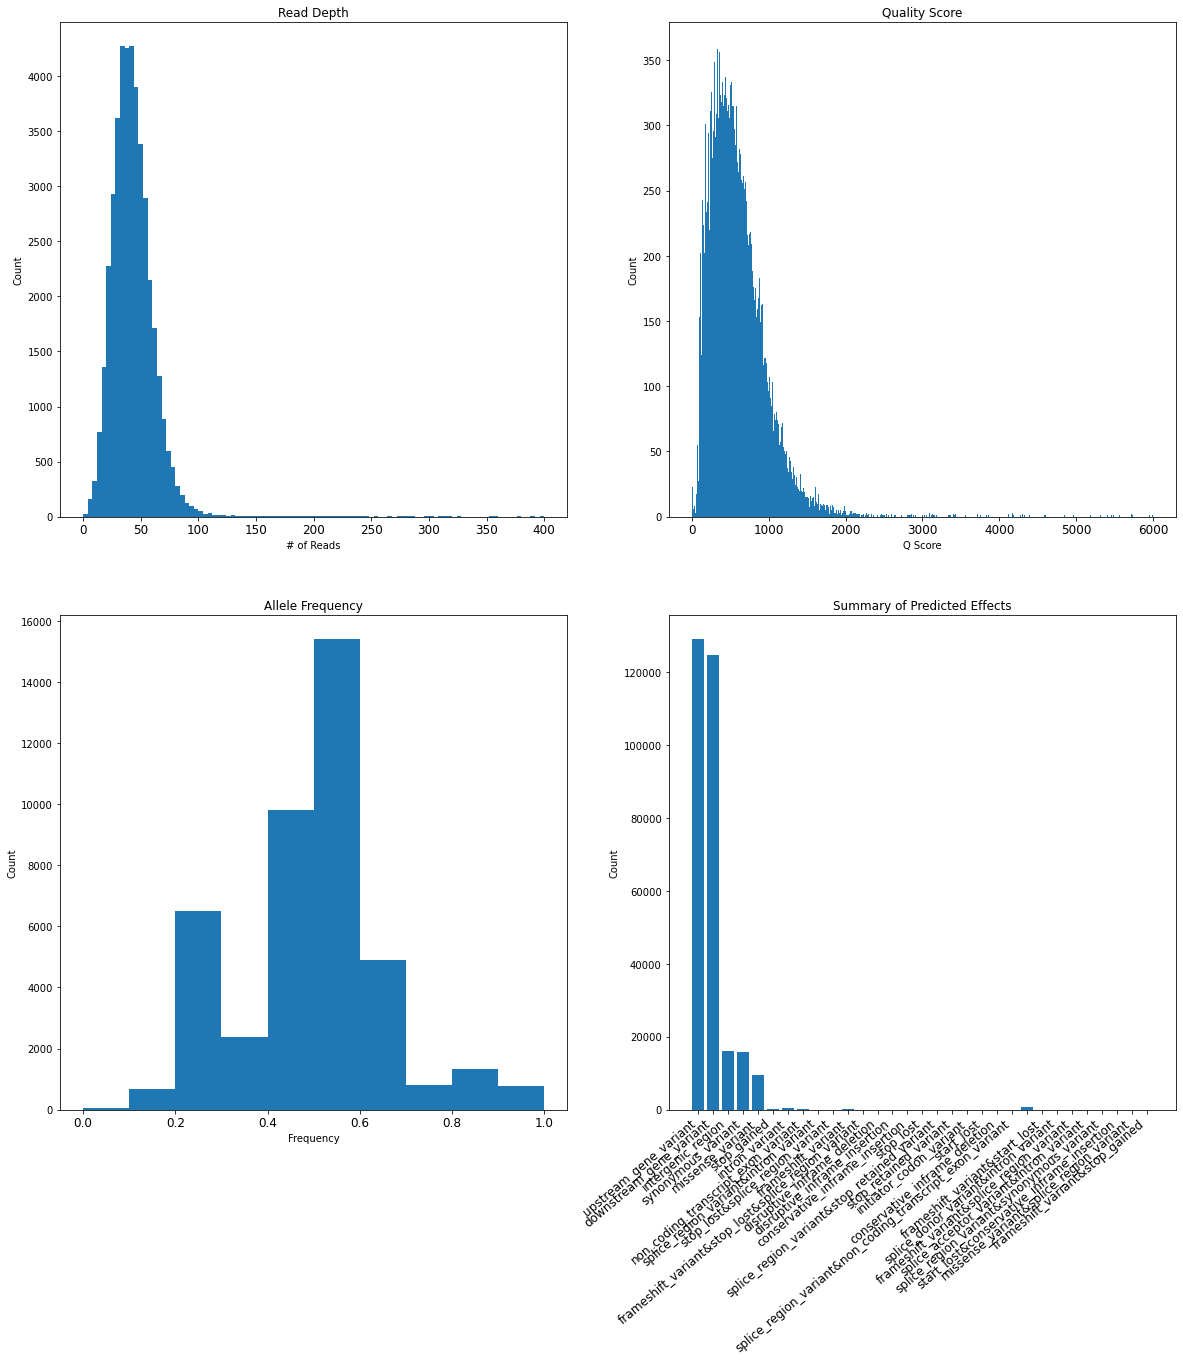

<Figure size 432x288 with 0 Axes>

In [93]:
fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(20,20))
keys=pred_ef.keys()
values=pred_ef.values()

ax[1][1].bar(keys,values)
ax[1][1].set_title("Summary of Predicted Effects")
ax[1][1].set_ylabel("Count")
#capped outliers at 400 reads
ax[0][0].hist(rd,range=(0,400),bins=100)
ax[0][0].set_title("Read Depth")
ax[0][0].set_ylabel("Count")
ax[0][0].set_xlabel("# of Reads")
ax[1][0].hist(af)
ax[1][0].set_title("Allele Frequency")
ax[1][0].set_ylabel("Count")
ax[1][0].set_xlabel("Frequency")
#capped outliers at a q score of 6000
ax[0][1].hist(qd,range=(0,6000),bins=1000)
ax[0][1].set_title("Quality Score")
ax[0][1].set_xlabel("Q Score")
ax[0][1].set_ylabel("Count")
plt.xticks(rotation=40, ha='right')

plt.show()
plt.savefig("yeast4panel.png")